## Placement de particule

### Sans contraintes

In [ ]:
%reset -f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Nous appelons configuration (ou config) une grille de taille size × size, dans laquelle se trouve placée des particules. Donc mathématiquement une configuration c'est un élément de
$$\{0,1\}^{size\times size}$$
où  
* 0 signale l'absence d'une particule.
* 1 signale la présence d'une particule.

In [ ]:
#créons une config à la main
size=4
a_config=np.zeros([size,size],dtype=bool)
a_config[0,0]=1
a_config[2,2]=1

fig,ax=plt.subplots()
ax.imshow(a_config)
ax.axis("off");

Voici une fonction pour générer une configuration aléatoire

In [ ]:
def random_config(size):
    return np.random.randint(2,size=(size,size))

Voici une fonction pour tracer plusieurs configurations.



#### ♡

In [ ]:
def plot_several_configs(nb,generation_fn):
    fix,axs=...
            config=generation_fn()
            axs[i,j].imshow(config)
            axs[i,j].axis("off")

In [ ]:
plot_several_configs(7,lambda: random_config(4))

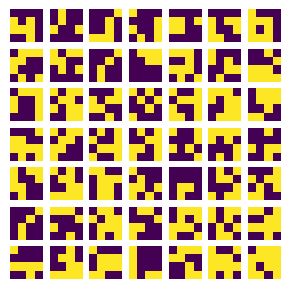

In [ ]:
#--- To keep following outputs, do not run this cell! ---

#### ♡♡


Le nombre moyen de particule que l'on observe est de:
$$
\color{red}{\square \square \square}
$$

La loi de ce nombre de particule est une loi <font color="red"> □ □ □ </font> de paramètre $n=\color{red}{\square \square \square}$ et $p=\color{red}{\square \square \square}$.

Quand $size$ est grand, la proportion de particule, bien qu'aléatoire, semble être assez "proche" de la moitié. Et plus size est grand, et plus cela semble être vrai.



Mathématisons cette remarque:


***proposition:*** Soit $Y\in [0,1]$ la proportion de site occupé. On a que
$$
\mathbf P[|Y-1/2|>\beta] \leq {1\over 4 size^2\beta^2}
$$
Démontrez cela en utilisant l'inégalité de Biennaymé-Techbitchev.










Aide: L'inégalité de Biennaymé-Techbitchev indique que pour toute v.a $X$, qui a pour variance $\sigma^2$, on a:
$$
\mathbf P[|X-\mathbf E[X]|>\alpha]\leq {\sigma^2\over \alpha^2}
$$
Appliquez cela en choisissant bien $X$.

#### ♡♡♡♡


 Prenons comme v.a $X$ le nombre de site occupé.Notons  $n=size*size$ le nombre de sites. La proportion de site occupé est donc $X/n$. Dans l'inégalité cela donne:




C'est pour cela que la toute première config que l'on a construit à la main (avec seulement 2 particules) ne semble pas "générique". Mais noter que le mot "générique" n'a pas ici de sens mathématique: dire qu'une configuration est générique signifie simplement qu'au premier coup d'oeil, on n'est pas surpris de l'observer.



Cependant toutes les config sont équiprobables: par exemple, on a autant de chance d'observer la config sans aucune particule, qu'une des configs de l'image ci-dessus.


***A vous:*** Expliquez pourquoi les configuration produites par la fonction `random_config` sont équiprobable.

#### ♡



### Avec contraine

On suppose maintenant que les particules sont trop grosses pour être disposées côte à côte sur une même colonne ou ligne (mais elles peuvent se toucher par la diagonale).

In [ ]:
def test_acceptable_config(config):
    if np.max(config[1:,:]+config[:-1,:])>1:
        return False
    if np.max(config[:,1:]+config[:,:-1])>1:
        return False
    return True

In [ ]:
def make_acceptable_config(size):
    acceptable=False
    while not acceptable:
        config=random_config(size)
        acceptable=test_acceptable_config(config)

    return config

In [ ]:
plot_several_configs(7,lambda: make_acceptable_config(4))

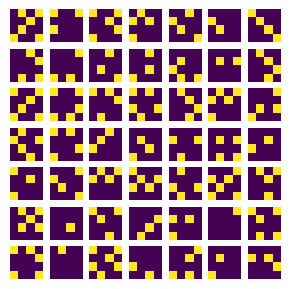

In [ ]:
#--- To keep following outputs, do not run this cell! ---

#### ♡




Remarquons que la fonction `make_acceptable_config` utilise simplement l'algorithme du  <font color="red"> □ □ □ </font>. Elle renvoie donc les configs acceptable de manière équiprobable.

### Comptons les rejets

Implémentons une fonction `count_rejection` qui estime l'espérance du nombre de rejet effectué avant de trouver une configuration acceptable.


#### ♡♡♡

In [ ]:
def count_rejection(size):


In [ ]:
nb_rejections=[]
for _ in range(1000):
    nb_rejection=count_rejection(4)
    nb_rejections.append(nb_rejection)

In [ ]:
plt.hist(


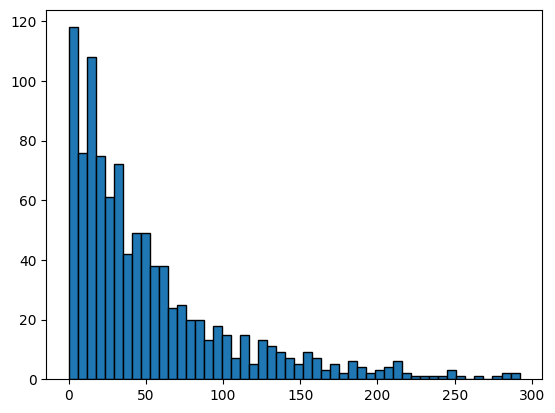

In [ ]:
#--- To keep following outputs, do not run this cell! ---

#### ♡

 Ce nombre de rejet suit une loi º(géomatriqueº)


### Exploitation: calcul du taux d'occupation

Mais à quoi cela sert de savoir simuler une configuration de particules?

La simulation permet, grâce à la technique de Monte Carlo, d'estimer des quantités "moyenne" pour les configs. C'est une des méthodes pour répondre aux questions de 'physique statistiques'.


La première question qui vient naturellement à l'esprit est de savoir quel est le "taux d'occupation" c.à.d  l'espérance du nombre moyen de particules.


Dans la phrase précédente  il y a le mot `espérance` et `nombre moyen`. Chacun se traduit par un `np.mean` dans le code ci-dessous. Complétez les commentaires.

#### ♡

In [ ]:
def one_size(size):
    nb_particules=[]
    for _ in range(200):
        config=make_acceptable_config(size)
        #Cette moyenne permet de calculer ...
        nb_particules.append(np.mean(config))
    #Cette moyenne permet de calculer ...
    return  np.mean(nb_particules)

In [ ]:
res=[]
sizes=[2,3,4,5] #à partir e 6 ça devient vraiment long à cause des trop nombreux rejets.
for size in sizes:
    res.append(one_size(size))
fig,ax=plt.subplots()
ax.set_xlabel("size")
ax.set_ylabel("taux d'occupation estimé")
ax.plot(sizes,res,"o");

#### ♡♡♡

Ce taux d'occupation semble diminuer quand `size` augmente. Auriez-vous une explication intuitive?




<font color='red'>Explication...</font>


### Et la diagonale

Supposons maintenant que les particules sont si grosses qu'elles ne peuvent pas non plus se toucher par la diagonale. Voici des simulations de config acceptables avec `size=4`:

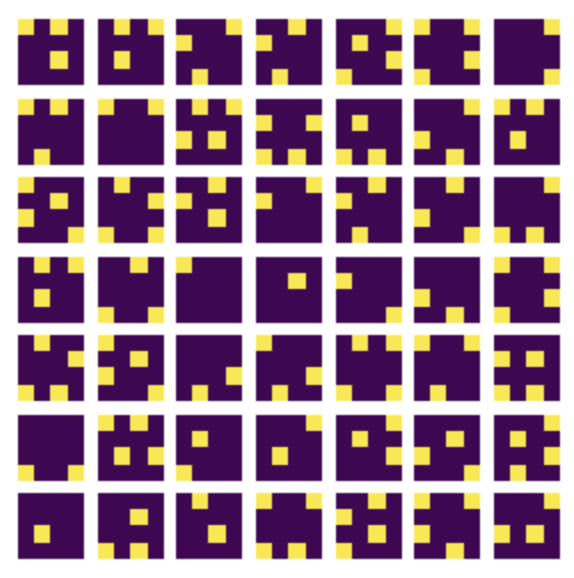

#### ♡

Le nombre de rejet pour simuler une telle configuration est plus <font color="red"> □ □ □ </font>.

#### ♡♡♡♡

Simuler des configurations avec cette nouvelle contrainte. Reproduisez un dessin qui ressemble à celui ci-dessus.

### Un domaine plus complexe

Supposons maintenant que l'on a toujours la contraine précédente, mais qu'en plus nos particules sont toutes rangée à des positions $(i,j)$ avec $i\leq j$.


Avec la manière "naturelle" de programme cela, le nombre de rejet sera <font color="red"> □ □ □ </font> que précédemment. L'algo de simulation sera donc <font color="red"> □ □ □ </font>.


Voici un exemple avec $size=7$.

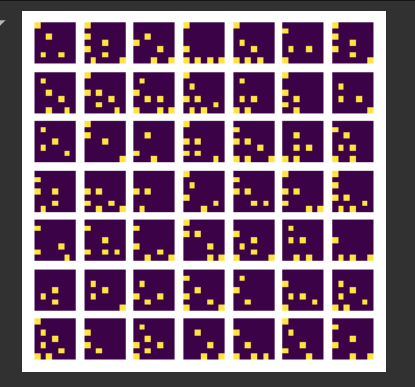

#### ♡♡♡♡♡

Simulez de telles configurations. Estimez le taux d'occupation pour $size=6$.

## Des algo efficace mais asymtotique


Quand le nombre de particules est grand notre algorithme du rejet devient trop inefficace.


Nous présentons ici la technique de Metropolis-Hastings qui fait partie des techniques MCMC (Monte Carlo Markov Chain).


Elle permet de simuler des configurations de grande tailles soumises à des contraintes.

Malheureusement, c'est une technique itérative asymptotique: on construit une suite de configuration, et c'est la configuration limite qui suit une loi uniforme.


In [ ]:
def droite_gauche(i,size):
    v_i=[i]
    if i>0:
        v_i.append(i-1)
    if i<size-1:
        v_i.append(i+1)
    return v_i


def un_voisin(config,i,j,size):
    for di in droite_gauche(i,size):
        for dj in droite_gauche(j,size):
            if config[di,dj]==1:
                return True
    return False


def metro(size,n_ite):

    config=np.zeros([size,size])

    for _ in range(n_ite):
        rand_i=np.random.randint(size)
        rand_j=np.random.randint(size)

        if config[rand_i,rand_j]==1:
            config[rand_i,rand_j]=0
        else:
            if not un_voisin(config,rand_i,rand_j,size):
                config[rand_i,rand_j]=1

    return config

config=metro(10,1000)
fig,ax=plt.subplots()
ax.axis("off")
ax.imshow(config);

***A vous:*** Décrivez la technique avec vos mots. Quel type de contrainte prend en compte cette algorithme. Réécrivez-le avec les autres types de contraintes.

#### ♡♡♡♡♡



## Les algo efficaces mais biaisé




D'autres techniques (pour des situations plus complexe encore) sont ne produisent pas des configs "équiprobable". Ces algos ont des "biais" (comme les dès truqués).


Voyons comme de tels algo permettent quand même de simuler des quantités comme "le taux d'occupation":











### La situation parfaite



Notons  $\mathcal C$ l'ensemble des configs acceptable.


Supposons dans un premier temps que l'on sait simuler une v.a $C$ qui suit une loi uniforme sur $\mathcal C$. Le taux d'occupation est donné par
$$
 {\sum_{c \in \mathcal C} \mathtt{np.mean}(c) \over {\text{cardinal } \mathcal C} }= \mathbf E[\mathtt{np.mean}(C)]
$$
( il y a 2 moyennes dans la formule, une pour l'espérance, une pour la moyenne du nombre de particule).

Et en prenant $(C_i:i<I)$ une suite de réalisation de $C$, ce taux d'occupation peut être estimé par
$$
\frac 1 I \sum_{i=0}^{I-1} \mathtt{np.mean(C_i)}
$$


### La situation biaisée


Supposons que l'on dispose d'un algo qui génère une configuration acceptable $C$. Notons
$$
p(c)= \mathbf P[C=c]
$$
Supposons de plus que $p$ soit proportionnelle à une fonction $q$ connue:
$$
\exists k>0 \ \forall c\in \mathcal C\qquad p(c)=k\, q(c)
$$
($q$ est alors appelée une pseudo-densité pour $C$)



***Proposition:*** le taux d'occupation moyen est donné par
$$
{\mathbf E[{\mathtt{np.mean}(C)\over  q(C) }]\over  
\mathbf E[{1\over  q(C) }]}
$$

Il peut donc être estimé en prenant des réalisation de $C$ et en calculant:
$$
    \sum_{i=0}^{I-1} \frac{1}{q(C_i)} \mathtt{np.mean}(C_i)
$$
puis en calculant
$$
    \sum_{i=0}^{I-1} \frac{1}{q(C_i)}
$$
puis en effectuant le rapport des deux quantités.


Démonstration la proposition. Le numérateur vaut:
$$
\mathbf E[{\mathtt{np.mean}(C)\over q(C) }]
= \sum_{c\in \mathcal C}  p(c) {{\mathtt{np.mean}}(c)\over q(c)}
=
k \sum_{c\in \mathcal C} \mathtt{np.mean}(c)
$$
Le dénominateur vaut
$$
\mathbf E[{1 \over q(C) }]
= \sum_{c\in \mathcal C}  p(c) { 1\over q(c)}
= k\, \text{cardinal} \, \mathcal C
$$
Le rapport des deux donne donc le taux d'occupation.


#### ♡

On a oublié une petite hypothèse pour que cette technique fonction:

 Il faut que $p$ º(ne s'annule pasº


### Remarque finale


Le fait de savoir simuler des v.a dont on connait la densité qu'à une constante multiplicative près (pseudo-densité) est très fréquent. Par exemple, quand nous avons simulé des configurations "acceptables" selon un critère ou un autre, nous savions  calculer une "pseudo-densité": c'était l'indicatrice qu'un configuration soit acceptable: $1_{\mathcal C}$ et on a même coder cette fonction en python.

Par contre la vrai densité est  
$$
{1_{\mathcal C}\over \text{cardinal } \mathcal C}
$$
Or, dès que la notion d'acceptabilité devient complexe, on est tout à fait incapable de compter le nombre d'élément dans $\mathcal C$.
